### Импорт библиотек

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

### Обеъдинение датасетов для обучения моделей

In [29]:
# Чтение данных
df1 = pd.read_csv('data/anemia.csv')
print('Датасет с нормой и анеией:')
display(df1.head(3))

df2 = pd.read_csv('data/leucosis.csv')
print('Датасет с лейкозами:')
display(df2.head(3))

df3 = pd.read_csv('data/new_diag.csv')
print('Датасет с другими диагнозами:')
display(df3.head(3))

Датасет с нормой и анеией:


,Age,Sex,MPV,RDW,RDW_SD,RDW_CV,PDW,EO_REL,EO_ABS,BA_REL,...,WBC,PCT,LY_REL,LY_ABS,NE_REL,NE_ABS,MO_REL,ESR_Westergren,SEGM_NEUT,ICD-10
0,61,0,NaN,10.99,NaN,14.76,13.93,3.06,0.12,1.87,...,8.53,0.31,33.02,2.85,56.87,6.51,9.44,NaN,48.09,Микроцитарно-гипохромная анемия (тяжёлая степень)
1,73,0,NaN,10.65,45.08,11.76,12.35,1.02,0.34,0.35,...,9.89,0.31,44.82,1.85,57.77,6.31,6.66,NaN,NaN,Микроцитарно-гипохромная анемия (тяжёлая степень)
2,19,0,9.12,10.55,45.93,NaN,NaN,2.96,0.23,1.33,...,7.55,NaN,25.35,2.35,64.64,3.74,4.53,8.83,NaN,Микроцитарно-гипохромная анемия (средняя степень)


Датасет с лейкозами:


,Sex,Age,ICD-10,BAND_NEUT,BA_ABS,BA_LEICO,BA_REL,COLOR_INDEX,EO_ABS,EO_LEICO,...,RBC,RDW,SEGM_NEUT,WBC,ESR_Westergren,MPV,PCT,PDW,RDW_CV,RDW_SD
0,0,86,Другой уточненный лейкоз,3.0,0.0,2.0,0.3,1.14,0.2,2.0,...,2.21,21.3,67.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,86,Другой уточненный лейкоз,1.0,0.0,NaN,0.4,1.16,0.2,4.0,...,1.91,20.5,63.0,9.1,NaN,NaN,NaN,NaN,NaN,NaN
2,0,86,Другой уточненный лейкоз,3.0,0.0,NaN,0.4,1.08,0.1,NaN,...,2.97,22.2,57.0,7.2,NaN,NaN,NaN,NaN,NaN,NaN


Датасет с другими диагнозами:


,Age,Sex,MPV,RDW,RDW_SD,RDW_CV,PDW,EO_REL,EO_ABS,BA_REL,...,WBC,PCT,LY_REL,LY_ABS,NE_REL,NE_ABS,MO_REL,ESR_Westergren,SEGM_NEUT,Diagnosis
0,41,1,9.85,11.29,52.32,NaN,NaN,2.77,0.10,1.61,...,8.67,0.37,22.94,2.49,64.67,6.04,4.53,8.94,NaN,Эритроцитоз
1,95,0,NaN,12.75,NaN,12.01,11.34,1.55,0.37,1.67,...,5.25,NaN,44.95,3.07,67.53,6.93,2.94,NaN,NaN,Эритроцитоз
2,30,0,10.85,11.24,NaN,NaN,12.84,1.31,0.25,0.87,...,6.22,NaN,22.47,3.98,65.00,2.53,10.07,NaN,NaN,Эритроцитоз


In [30]:
# Изменяем названия столбцов с диагнозами, чтобы везде он назывался одинаково
df3.rename(columns={'Diagnosis': 'ICD-10'}, inplace=True)

In [ ]:
# Создаем множества названий столбцов датасетов
unique_cols_df1 = set(list(df1.columns))
unique_cols_df2 = set(list(df2.columns))
unique_cols_df3 = set(list(df3.columns))

In [33]:
# Проверяем, все ли названия столбцов совпадают
print(unique_cols_df1 == unique_cols_df2)
print(unique_cols_df1 == unique_cols_df3)
print(unique_cols_df2 == unique_cols_df3)

False
True
False


Есть различия у второго множества с другими

In [34]:
# Функция для поиска различий между множествами
def check_sets_difference(set1, set2):
    # Объединение всех множеств
    union_set = set1.union(set2)

    # Вывод различий
    for value in union_set:
        if value not in set1:
            print(f"Столбец '{value}' отсутствует в первом множестве")
        elif value not in set2:
            print(f"Столбец '{value}' отсутствует во втором множестве")

In [35]:
check_sets_difference(unique_cols_df1, unique_cols_df2)

Столбец 'COLOR_INDEX' отсутствует в первом множестве


In [37]:
check_sets_difference(unique_cols_df3, unique_cols_df2)

Столбец 'COLOR_INDEX' отсутствует в первом множестве


Таким образом, у нас во втором множестве присуствует столбец 'COLOR_INDEX', которого нет в других датасетах, в связи с чем его необходимо удалить перед объединением

In [ ]:
# Удаляем соответствующий столбец во втором датасете
df2_dropped = df2.drop(axis=1, columns='COLOR_INDEX')

In [56]:
# Объединение всех датасетов
combined_df = pd.concat([df1, df2_dropped, df3], ignore_index=True)

# Вывод объединенного датафрейма
combined_df.head()

,Age,Sex,MPV,RDW,RDW_SD,RDW_CV,PDW,EO_REL,EO_ABS,BA_REL,...,WBC,PCT,LY_REL,LY_ABS,NE_REL,NE_ABS,MO_REL,ESR_Westergren,SEGM_NEUT,ICD-10
0,61,0,NaN,10.99,NaN,14.76,13.93,3.06,0.12,1.87,...,8.53,0.31,33.02,2.85,56.87,6.51,9.44,NaN,48.09,Микроцитарно-гипохромная анемия (тяжёлая степень)
1,73,0,NaN,10.65,45.08,11.76,12.35,1.02,0.34,0.35,...,9.89,0.31,44.82,1.85,57.77,6.31,6.66,NaN,NaN,Микроцитарно-гипохромная анемия (тяжёлая степень)
2,19,0,9.12,10.55,45.93,NaN,NaN,2.96,0.23,1.33,...,7.55,NaN,25.35,2.35,64.64,3.74,4.53,8.83,NaN,Микроцитарно-гипохромная анемия (средняя степень)
3,73,1,10.57,14.47,NaN,10.27,NaN,0.61,0.09,0.10,...,6.23,0.28,29.88,2.60,50.77,6.88,3.44,NaN,51.06,Микроцитарно-гипохромная анемия (тяжёлая степень)
4,64,1,9.92,17.83,NaN,NaN,NaN,4.15,0.35,1.54,...,9.62,0.17,28.64,1.33,66.52,4.17,11.26,NaN,68.95,Микроцитарно-гипохромная анемия (тяжёлая степень)


In [44]:
# Проверка размерностей
if (df1.shape[0] + df2.shape[0] + df3.shape[0] == combined_df.shape[0]) == True:
    print('Все датасеты правильно объединились')
else:
    print('Размерности не совпадают')

Все датасеты правильно объединились


#### Кодируем диагнозы в числовой тип данных

0 - это норма, остальные диагнозы будут закодированы в случайном порядке

In [57]:
combined_df['ICD-10'].unique()

array(['Микроцитарно-гипохромная анемия (тяжёлая степень)',
       'Микроцитарно-гипохромная анемия (средняя степень)',
       'Нормоцитарно-нормохромная анемия (средняя степень)',
       'Нормоцитарно-нормохромная анемия (тяжёлая степень)',
       'Нормоцитарно-нормохромная анемия (лёгкая степень)',
       'Гиперхромно-макроцитарная анемия (средняя степень)',
       'Гиперхромно-макроцитарная анемия (тяжёлая степень)',
       'Выраженный макроцитоз', 'Норма', 'Другой уточненный лейкоз',
       'Хронический лимфоцитарный лейкоз', 'Острый миелоидный лейкоз',
       'Другой миелоидный лейкоз', 'Плазмоклеточный лейкоз',
       'Волосатоклеточный лейкоз',
       'Острый лейкоз неуточненного клеточного типа',
       'Острый миеломоноцитарный лейкоз', 'Хронический миелоидный лейкоз',
       'Острый лимфобластный лейкоз', 'Эритроцитоз', 'Нейтрофилез',
       'Нейтропения', 'Агранулоцитоз', 'Эозинофилия', 'Моноцитоз',
       'Лимфоцитоз', 'Лимфоцитопения', 'Гипертромбоцитоз',
       'Тромбоцит

In [61]:
# Список диагнозов
diagnoses = list(combined_df['ICD-10'].unique())
diagnoses.remove('Норма')

# Создание словаря для кодирования
diagnoses_dict = {diag: i for i, diag in enumerate(diagnoses)}
diagnoses_dict['Норма'] = 0  # Убедимся, что 'Норма' имеет код 0

# Применение кодирования к столбцу с диагнозом
combined_df['ICD-10'] = combined_df['ICD-10'].map(diagnoses_dict)

# Проверяем кодировку
combined_df['ICD-10'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

### Выбор признаков

#### Анализ корреляций

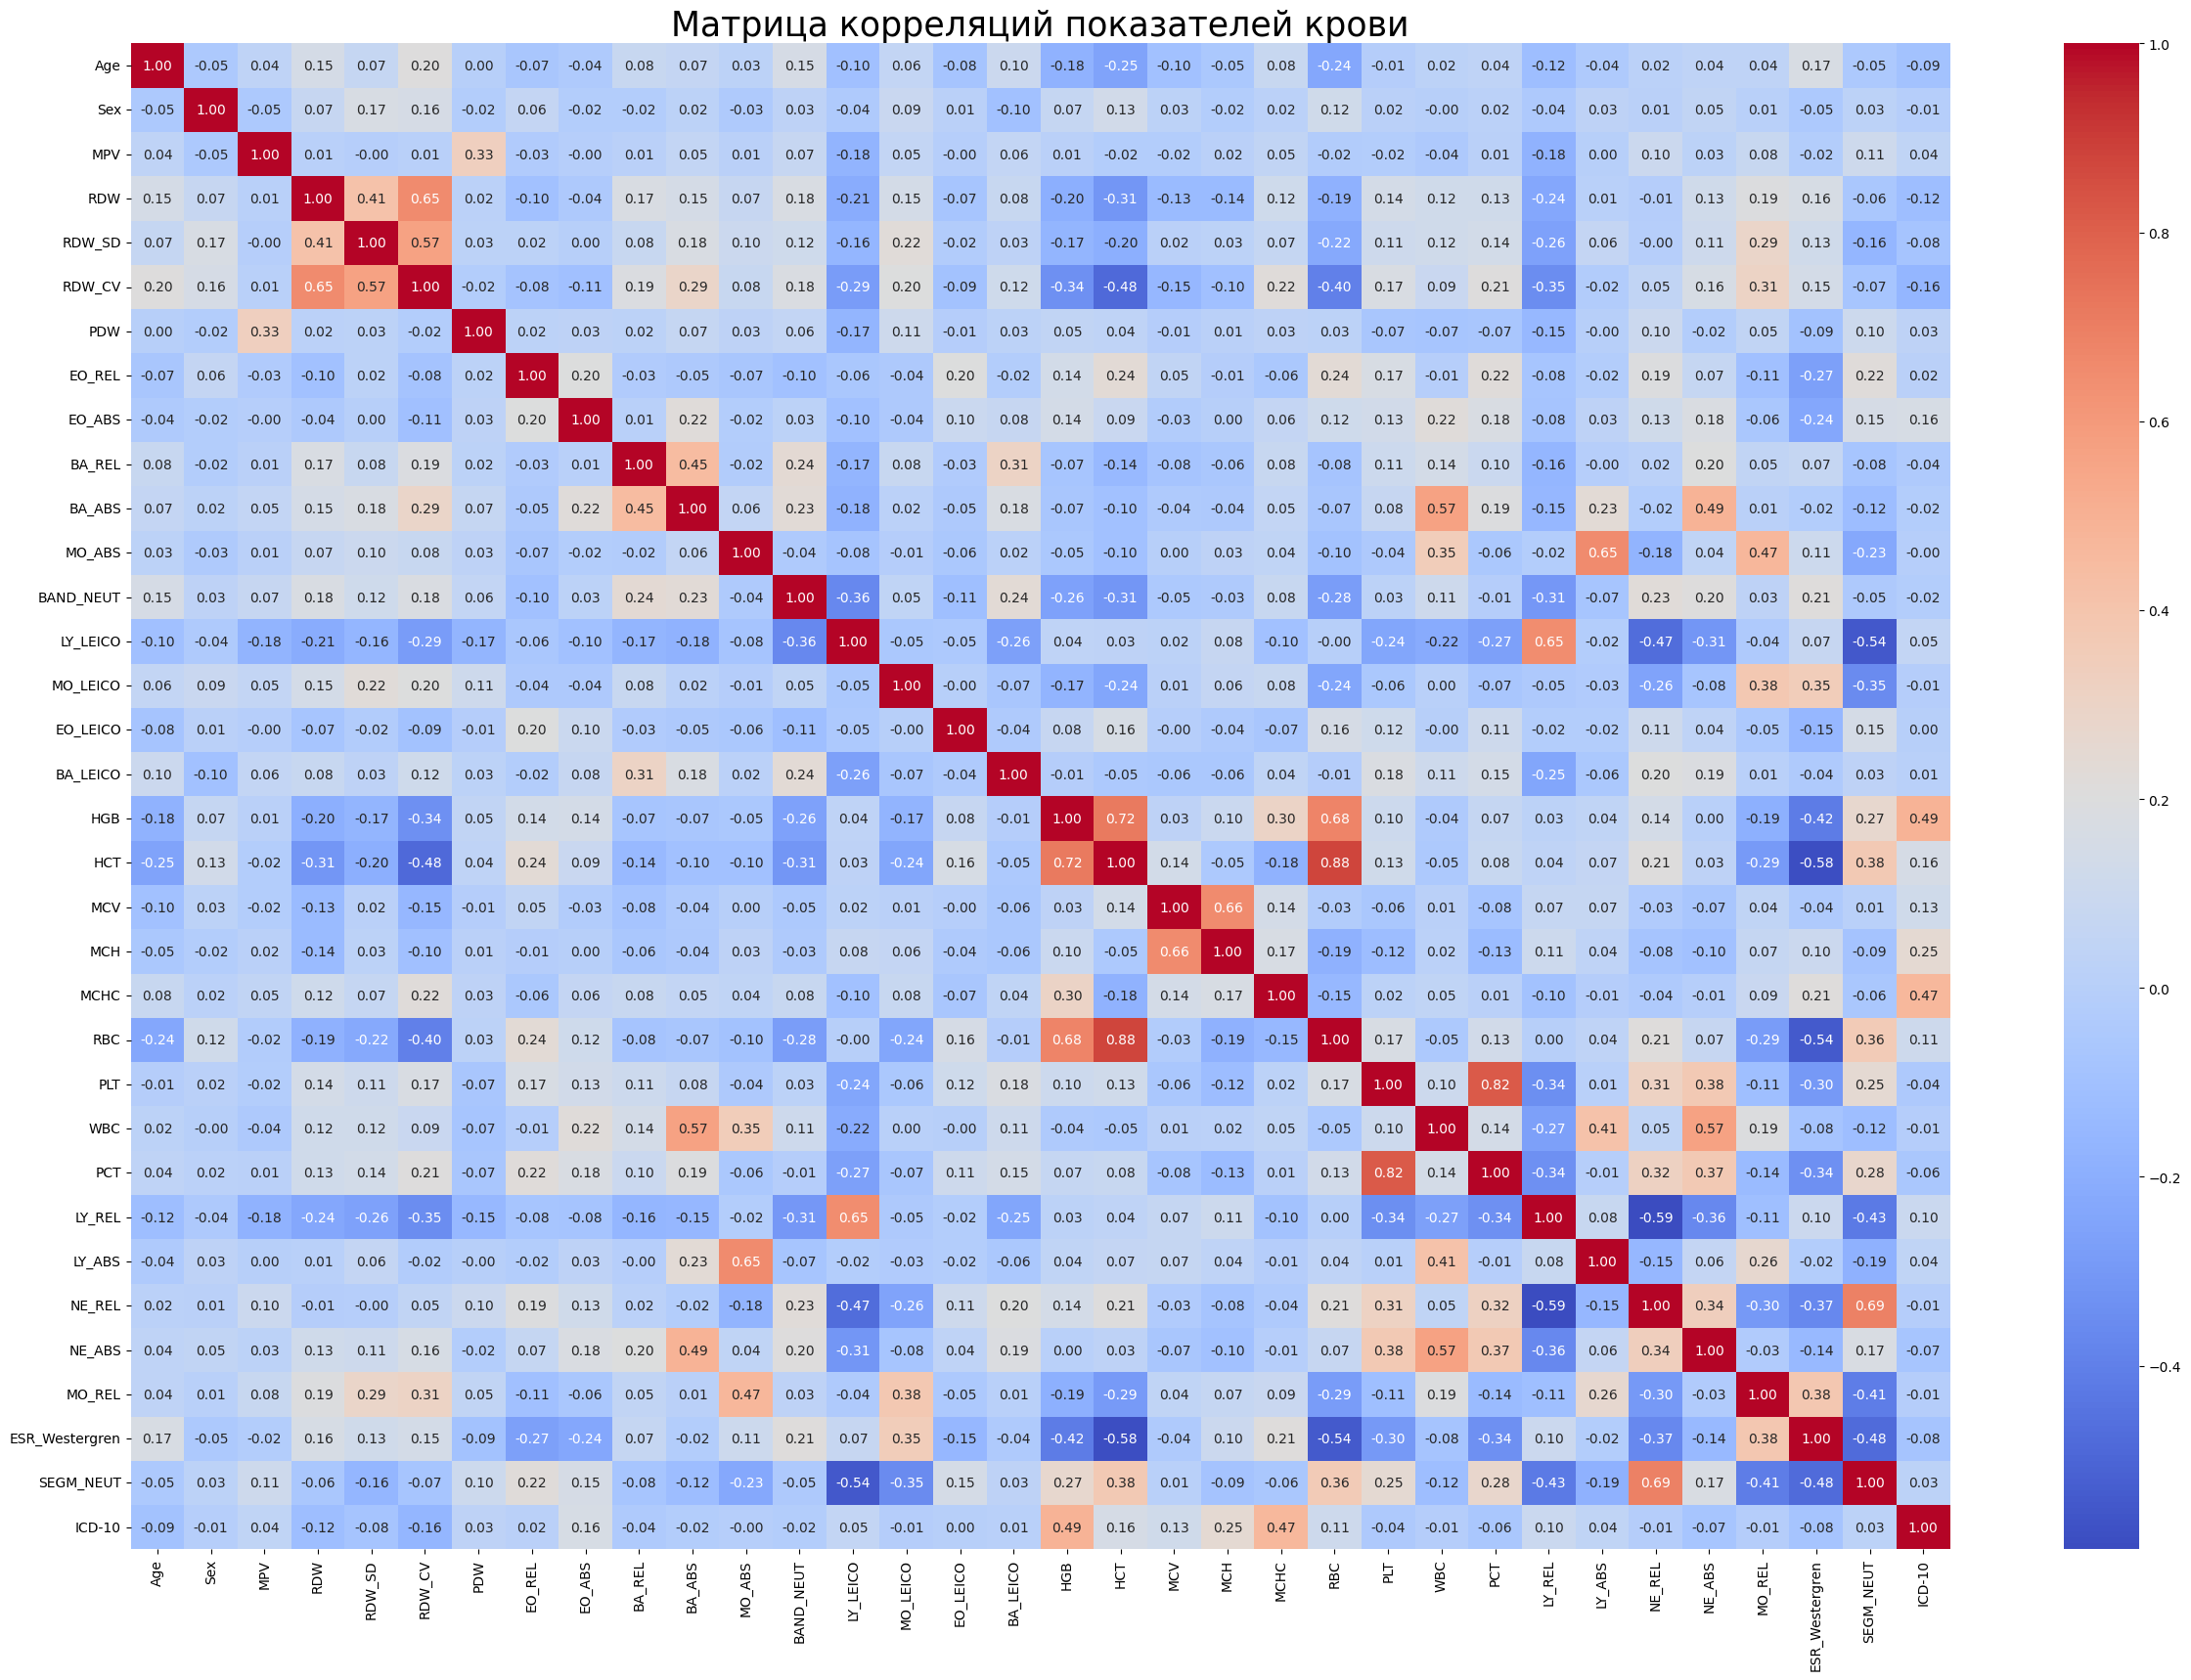

In [62]:
# Рассчитываем матрицу корреляций
correlation_matrix = combined_df.corr()

# Создаем тепловую карту
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Матрица корреляций показателей крови', fontsize=25)
plt.show()

При оценке силы связи коэффициентов корреляции используется шкала Чеддока:

 - От 0 до 0,3 — очень слабая корреляция
 - От 0,3 до 0,5 — слабая корреляция
 - От 0,5 до 0,7 — средняя корреляция
 - От 0,7 до 0,9 — сильная (высокая) корреляция
 - От 0,9 до 1,0 — очень сильная (очень высокая) корреляция

Вывод: 
Сильную положительную корреляцию имеют признаки: 
 - RBC и HCT
 - HCT и HGB

Среднюю положительную корреляцию имеют признаки: 
 - RDW_CV и RDW 
 - RDW_CV и RDW_SD
 - MCH и MCV 
 - RBC и HGB
 - WBC и BA_ABS
 - LY_REL и LY_LEICO
 - LY_ABS и MO_ABS
 - NE_ABS и WBS
 - NE_REL и SEGM_NEUT

Отрицательную среднюю корреляцию имеют признаки: 
 - SEGM_NEUT и LY_LEICO 
 - ESR_Westergren и HCT
 - ESR_Westergren и RBC
 - NE_REL и LY_REL

Было принято избавиться только от очень сильной корреляции и, так как таковая отсутсвует у наших признаков, по результатам корреляционного анализа никакие признаки удалены не будут. 

Также стоит отметить, что у нас практически все признаки очень слабо коррелируют с целевой переменной диагноза. Это может говорить о том, что наши признаки имеют нелинейную связь с целевой переменной, но также может и значить, что в действительности эти признаки не имеют значимой связи с целевой переменной и не являются информативными в ее предсказании. Однако, корреляционный анализ не позвояет всесторонне изучить взаимосвязь признаков, поэтому для этого применяются и другие методы.

In [67]:
from sklearn.feature_selection import mutual_info_regression

# Допустим, X - это матрица признаков, а y - целевая переменная
mi_scores = mutual_info_regression(X, y)

# Вывод значений взаимной информации для каждого признака
for feature, score in zip(X.columns, mi_scores):
    print(f"Feature: {feature}, MI Score: {score}")

Feature: Age, MI Score: 0.5254704347497503
Feature: Sex, MI Score: 0.09590828309574029
Feature: MPV, MI Score: 0.2458965044347341
Feature: RDW, MI Score: 0.5297294205130063
Feature: RDW_SD, MI Score: 0.16650048828090291
Feature: RDW_CV, MI Score: 0.28306689419583186
Feature: PDW, MI Score: 0.13220863093630086
Feature: EO_REL, MI Score: 0.4435196528789662
Feature: EO_ABS, MI Score: 0.4582312660852974
Feature: BA_REL, MI Score: 0.4659449088777565
Feature: BA_ABS, MI Score: 0.09128387371675517
Feature: MO_ABS, MI Score: 0.5277988924355661
Feature: BAND_NEUT, MI Score: 0.2309749373158816
Feature: LY_LEICO, MI Score: 0.24857012658691957
Feature: MO_LEICO, MI Score: 0.2673426566109516
Feature: EO_LEICO, MI Score: 0.6013322822910236
Feature: BA_LEICO, MI Score: 0.17485224048803616
Feature: HGB, MI Score: 0.9821805219029187
Feature: HCT, MI Score: 0.5760409770846415
Feature: MCV, MI Score: 0.7157704316217215
Feature: MCH, MI Score: 0.6774293755263541
Feature: MCHC, MI Score: 0.7798129490412684

#### Feature Importance (Важность признаков)

In [68]:
# Разделение данных на признаки и целевую переменную
X = combined_df.iloc[:,:-1]
y = combined_df['ICD-10']

# Заполняем пустые значения нулями
X = X.fillna(0)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Создание модели Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Получение важности признаков
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Вывод важности признаков
for i in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[i]]}: {importances[indices[i]]}")

PLT: 0.09071837063724261
NE_ABS: 0.0865442847356476
HGB: 0.08272144723392338
MCV: 0.08234209248177324
LY_ABS: 0.06734274812175926
EO_ABS: 0.04784535878469223
MCH: 0.046780003443436406
HCT: 0.044309060029277966
MCHC: 0.04394401442104578
MO_ABS: 0.04362863771163595
LY_REL: 0.043097911690335965
RBC: 0.0321730249731948
WBC: 0.03161045030859158
RDW: 0.026726075047087038
NE_REL: 0.020427765415263418
Age: 0.020053606547800636
EO_LEICO: 0.01993883201502092
Sex: 0.017186189117445877
MO_REL: 0.016030234395169214
EO_REL: 0.01563056393036675
BA_ABS: 0.015210350827405546
PCT: 0.01383444739323682
BA_REL: 0.011699259368830945
BAND_NEUT: 0.011529032807671789
RDW_CV: 0.009630386083011063
SEGM_NEUT: 0.009343928070370067
LY_LEICO: 0.009342696263331396
ESR_Westergren: 0.007878251364051953
MPV: 0.007541604822884283
MO_LEICO: 0.007243832228052986
RDW_SD: 0.007057971477491217
PDW: 0.0058799549748186
BA_LEICO: 0.004757613278132677


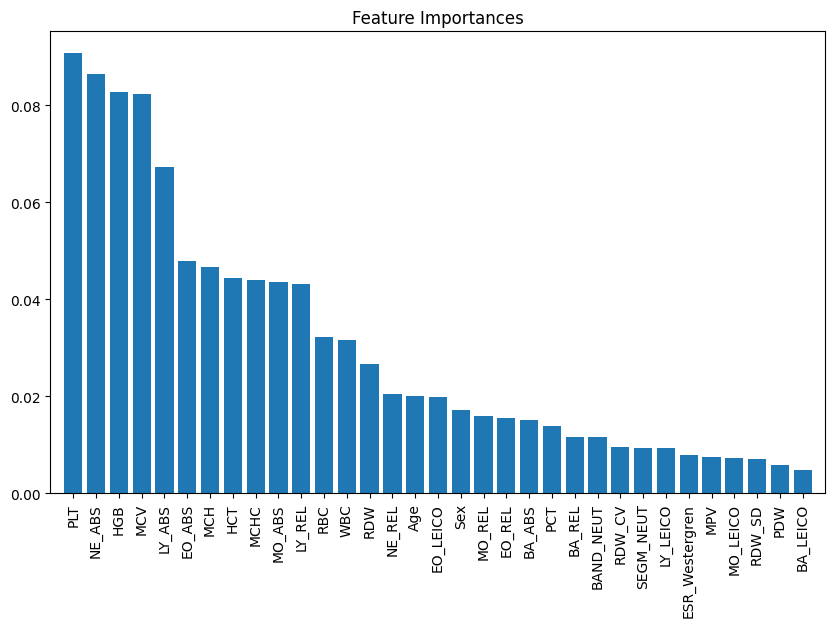

In [70]:
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [74]:
# Использование перекрестной проверки для подбора порога отсечения важности признаков
# Создание модели Random Forest с отбором признаков
selector = SelectFromModel(model, threshold=0.001)
# Адекватные пороги: 0.005, 0.0025, 0.001
X_selected = selector.transform(X_train)

# Оценка модели с выбранными признаками
scores = cross_val_score(model, X_selected, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

c:\Users\Екатерина\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Екатерина\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.95172414 0.93448276 0.95862069 0.95689655 0.92400691]
Mean cross-validation score: 0.9451462092787803


Вывод: по результатам перекрестной проверки для подбора порога отсечения коэффициента важности признаков при пороге 0,001 и проведении кросс-валидации была получена срденяя точность 0,95, что говорит о хорошей предсказательной точности моедли на отобранных признаков. 

#### SelectKBest

Метод отбора признаков, который выбирает K лучших признаков на основе статистических тестов. Суть этого метода заключается в оценке каждого признака с использованием определенного статистического теста и выборе тех признаков, которые имеют самые высокие оценки.

Предварительно надо убрать пропуски в данных

In [ ]:
# Выбор лучших признаков
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X_train, y_train)

# Вывод лучших признаков
selected_features = X.columns[selector.get_support()]
print(selected_features)